##### 용어 정리
- frozen mackerel : 냉동 고등어
- refrigerated mackerel : 냉장 고등어
- output : 생산량
- price : 가격
- import : 수입
- export : 수출
- quantity : 물량

In [2]:
import pandas as pd

##### 고등어 가격
- 자료출처 : KAMIS(https://www.kamis.or.kr/customer/price/fisheriesRetail/period.do?action=monthly&yyyy=2024&period=3&countycode=2100&itemcategorycode=600&itemcode=611&kindcode=05&productrankcode=0&convert_kg_yn=N)
- 대형마트, 전통시장 등에서 소비자에게 판매하는 가격
- 中품 고등어 1마리 기준 가격

#### 고등어 생산량
- 출처 : KOSIS(https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1EW0004&vw_cd=MT_ZTITLE&list_id=K2_7&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE)
- 대한민국 부산에서 생산된 고등어(선어) 총 량

### 고등어 가격

In [10]:
mackerel_price = pd.read_csv("../data/mackerel/mackerel_price.csv", encoding='cp949')

# 보간법으로 결측치 처리
mackerel_price['가격 (원)'] = mackerel_price['가격 (원)'].interpolate()
mackerel_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      192 non-null    int64  
 1   월       192 non-null    int64  
 2   가격 (원)  192 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 4.6 KB


In [4]:
mackerel_price

,년도,월,가격 (원)
0,2008,1,2373.0
1,2008,2,2413.0
2,2008,3,2436.0
3,2008,4,2510.0
4,2008,5,2511.0
...,...,...,...
187,2023,8,2932.0
188,2023,9,2875.0
189,2023,10,2489.0
190,2023,11,2649.0


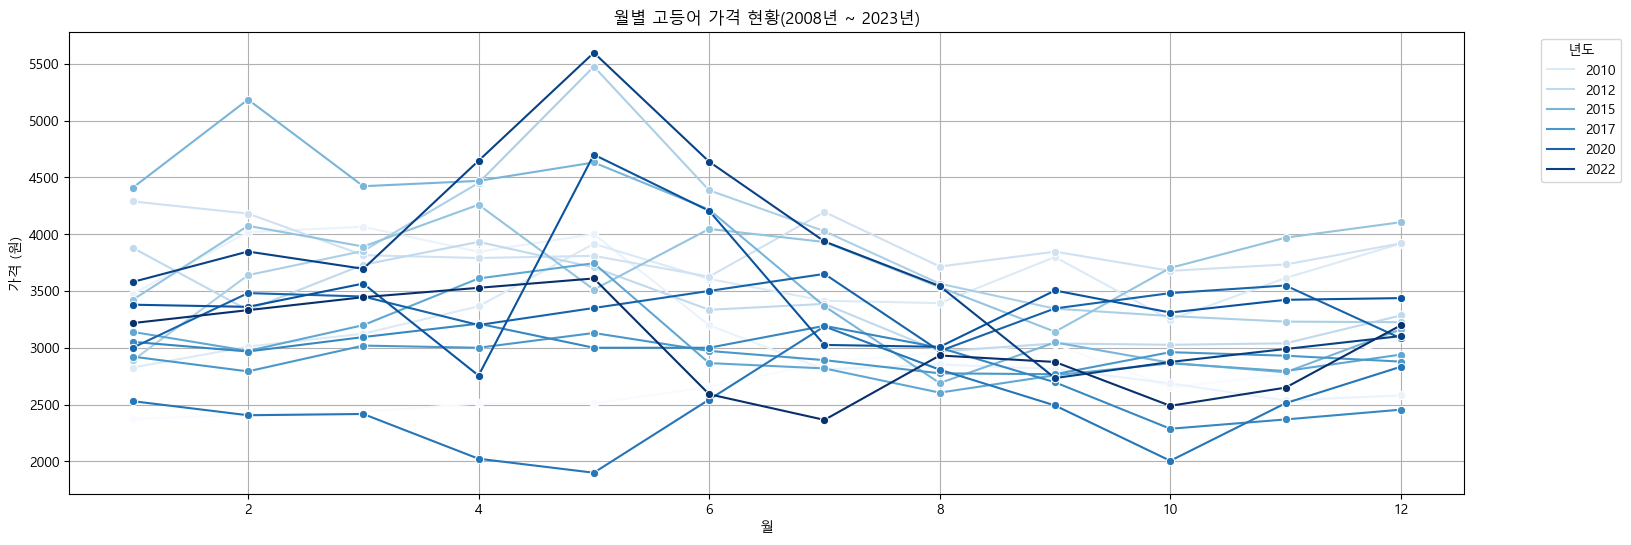

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

# 그래프의 크기 설정
plt.figure(figsize=(18, 6))

# 선 그래프 그리기
sns.lineplot(data=mackerel_price, x='월', y='가격 (원)', hue=mackerel_price['년도'], marker='o', linestyle='-', palette='Blues')

# 그래프 제목과 축 라벨 설정
plt.title('월별 고등어 가격 현황(2008년 ~ 2023년)')
plt.xlabel('월')
plt.ylabel('가격 (원)')

# 범례 위치 설정
plt.legend(title='년도', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.grid(True)
plt.show()

In [6]:
# CSV파일로 저장
mackerel_price.to_csv('../data/mackerel/mackerel_price_interpolate.csv', index=False)

### 고등어 생산량

In [12]:
# 데이터 불러오기
mackerel_output=pd.read_csv('../data/mackerel/부산_고등어_생산량(선어).csv',encoding='cp949')

In [13]:
# 가격 비교를 위한 mackerel
mackerel_for_price=mackerel_output[mackerel_output['년도']<=2023]
mackerel_for_price

,년도,월,생산량
0,2008,1,7994
1,2008,2,1430
2,2008,3,3001
3,2008,4,1385
4,2008,5,582
...,...,...,...
187,2023,8,5698
188,2023,9,9903
189,2023,10,9163
190,2023,11,11462


In [17]:
# merge
mackerel=pd.merge(mackerel_price,mackerel_for_price,on=['년도','월'])
mackerel

,년도,월,가격 (원),생산량
0,2008,1,2373.0,7994
1,2008,2,2413.0,1430
2,2008,3,2436.0,3001
3,2008,4,2510.0,1385
4,2008,5,2511.0,582
...,...,...,...,...
187,2023,8,2932.0,5698
188,2023,9,2875.0,9903
189,2023,10,2489.0,9163
190,2023,11,2649.0,11462


##### 고등어 월별 평균수입가격

- 자료출처 : 관세청(https://tradedata.go.kr/cts/index.do)
- 고등어의 일, 주, 월간 수입물품가액에 운임, 보험료, 관세 등 제세를 합친 금액을 중량으로 나눈 kg당 평균가격

In [15]:
mackerel_import_price = pd.read_csv("../data/mackerel/고등어 월별 평균수입가격.csv", encoding='cp949')
mackerel_import_price = mackerel_import_price.drop(columns=['고등어(신선,냉장) (원/kg)'])
mackerel_import_price

,년도,월,고등어(냉동) (원/kg),수입량(톤)
0,2014,1,2955,3476
1,2014,2,2974,1101
2,2014,3,2562,2011
3,2014,4,2688,2454
4,2014,5,2679,1995
...,...,...,...,...
117,2023,10,3302,193
118,2023,11,3002,2127
119,2023,12,2918,10476
120,2024,1,2997,2496


##### 국가별 고등어 수입 물량(kg) 

- 자료출처 : 수산물수출정보포털(https://kfishinfo.co.kr/kor/view.do?no=626#)

In [18]:
mackerel_import_quantity = pd.read_csv("../data/mackerel/국가별 고등어 수입 물량(kg).csv", encoding='cp949')
# '국가' 열을 기준으로 그룹화하여 각 국가별로 수출물량 합산
mackerel_import_quantity = mackerel_import_quantity.groupby('국가').sum()
# '구분' 열 삭제
mackerel_import_quantity = mackerel_import_quantity.drop(columns='구분')
# 데이터를 숫자형으로 변환
mackerel_import_quantity = mackerel_import_quantity.apply(pd.to_numeric, errors ='ignore')
# 합계 열 추가
mackerel_import_quantity['합계'] = mackerel_import_quantity.sum(axis=1)
# 합계 열 기준 내림차순 정렬
mackerel_import_quantity = mackerel_import_quantity.sort_values(by='합계', ascending=False)
mackerel_import_quantity


,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,합계
국가,,,,,,,,,,
노르웨이,36160118,38765235,36518692,36812100,34876470,36400226,45212330,49312434,51305747,365363352
중국,9290431,2788194,2058661,2346076,5645192,3041401,4298540,2734252,4191905,36394652
러시아,0,0,66166,23772,0,5440089,3120125,1217500,33598,9901250
페루,0,1740000,4687500,25660,0,0,0,0,0,6453160
대만,3300180,95350,0,707680,0,125550,152910,0,1352314,5733984
영국,1460001,686660,628800,240002,336000,1,120000,1284200,144000,4899664
네덜란드,192000,202788,218093,416906,817034,25588,278898,352155,589125,3092587
베트남,209890,150308,169295,292788,321920,378909,207718,280700,308372,2319900
태국,87631,28308,74172,115419,167940,207048,87253,65490,275857,1109118


In [29]:
mackerel_import_quantity.sum()

2015년     51182035
2016년     44563687
2017년     44952003
2018년     41747882
2019년     42580858
2020년     46118639
2021년     53944832
2022년     56158168
2023년     58474801
합계       439722905
dtype: int64

##### 국가별 고등어 수출 물량(kg)

- 자료출처 : 수산물수출정보포털(https://kfishinfo.co.kr/kor/view.do?no=626#)

In [8]:
mackerel_export_quantity = pd.read_csv("../data/mackerel/국가별 고등어 수출 물량(kg).csv", encoding='cp949')
# '국가' 열을 기준으로 그룹화하여 각 국가별로 수출물량 합산
mackerel_export_quantity = mackerel_export_quantity.groupby('국가').sum()
# '구분' 열 삭제
mackerel_export_quantity = mackerel_export_quantity.drop(columns='구분')
# 데이터를 숫자형으로 변환
mackerel_export_quantity = mackerel_export_quantity.apply(pd.to_numeric, errors ='ignore')
# 합계 열 추가
mackerel_export_quantity['합계'] = mackerel_export_quantity.sum(axis=1)
# 합계 열 기준 내림차순 정렬
mackerel_export_quantity = mackerel_export_quantity.sort_values(by='합계', ascending=False)
mackerel_export_quantity

,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,합계
국가,,,,,,,,,,
나이지리아,162173,1204500,2377650,16305635,18031300,4098003,8021213,22814363,18486604,91501441
가나,1773080,3895491,1433320,11635888,4755078,4550549,6581720,25141650,23429240,83196016
코트디부아르,1186080,1931180,812500,2352116,0,106482,1197460,3547284,22344941,33478043
중국,1807554,946418,2034467,6538089,3953192,9896788,1800915,1639554,2716093,31333070
탄자니아,7482049,5817435,1929700,2278052,213260,818120,2053225,956600,1078300,22626741
...,...,...,...,...,...,...,...,...,...,...
니카라과,0,0,0,19,0,0,0,5,0,24
우간다,0,0,0,0,13,10,0,0,0,23
코스타리카,0,0,0,0,0,0,0,0,19,19
